In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

In [2]:
road = gpd.read_file('../road.csv')
road

,id,old_id,WKT,source,target,cost,x1,y1,x2,y2,geometry
0,0,0,"LINESTRING (116.3894407 39.9062721, 116.389446...",0,5742,28.93911749977911,116.3894407,39.9062721,116.3894463,39.9060115,"LINESTRING (116.38944 39.90627, 116.38945 39.9..."
1,1,1,"LINESTRING (116.3894407 39.9062721, 116.386428...",0,1,257.87336107240327,116.3894407,39.9062721,116.386428,39.9061687,"LINESTRING (116.38944 39.90627, 116.38643 39.9..."
2,2,1,"LINESTRING (116.386428 39.9061687, 116.3856338...",1,38994,67.97674335500204,116.386428,39.9061687,116.3856338,39.9061421,"LINESTRING (116.38643 39.90617, 116.38563 39.9..."
3,3,2,"LINESTRING (116.3930703 39.906394, 116.3894407...",2,0,310.66360462307574,116.3930703,39.906394,116.3894407,39.9062721,"LINESTRING (116.39307 39.90639, 116.38944 39.9..."
4,4,3,"LINESTRING (116.3970962 39.9065222, 116.393070...",3,2,344.5499349831967,116.3970962,39.9065222,116.3930703,39.906394,"LINESTRING (116.39710 39.90652, 116.39307 39.9..."
...,...,...,...,...,...,...,...,...,...,...,...
85390,85390,38025,"LINESTRING (116.4062083 39.8313723, 116.406357...",49687,49686,26.350831105766865,116.4062083,39.8313723,116.406357,39.8311645,"LINESTRING (116.40621 39.83137, 116.40636 39.8..."
85391,85391,38026,"LINESTRING (116.3121472 39.9935096, 116.312172...",49693,42179,39.35541100862528,116.3121472,39.9935096,116.3121727,39.9931557,"LINESTRING (116.31215 39.99351, 116.31217 39.9..."
85392,85392,38026,"LINESTRING (116.3121727 39.9931557, 116.312119...",42179,42178,8.128968151358936,116.3121727,39.9931557,116.3121191,39.993095200000006,"LINESTRING (116.31217 39.99316, 116.31212 39.9..."
85393,85393,38026,"LINESTRING (116.3121191 39.9930952, 116.312155...",42178,42177,49.5513024747446,116.3121191,39.993095200000006,116.3121553,39.9926498,"LINESTRING (116.31212 39.99310, 116.31216 39.9..."


In [3]:
road['id']=road['id'].astype(int)

In [4]:
c = pd.read_csv('result.csv', sep=';')
c

,id,cpath,mgeom
0,0,"81227,81228,81229,81230,81231,81232,81233,8123...","LINESTRING(116.319263822 39.9996783963,116.318..."


In [5]:
nodes = c.loc[0,'cpath']
nodes = list(eval(nodes))
nodes

[81227,
 81228,
 81229,
 81230,
 81231,
 81232,
 81233,
 81234,
 81235,
 12984,
 12985,
 12986,
 12987,
 12988,
 12989,
 12990,
 12991,
 12992,
 12993,
 12994,
 81236,
 81237,
 81238,
 81239,
 12825,
 12826,
 84068,
 12838,
 61093,
 61094,
 61095,
 61096,
 61050,
 61051,
 61052,
 61053,
 61054,
 77082,
 77083,
 77084,
 77085,
 20471,
 20472,
 20473,
 3144,
 40488,
 40489,
 40490,
 12842,
 12843,
 12844,
 12845,
 12846,
 3103,
 3104,
 3105,
 3117,
 3118,
 77290,
 77277,
 32120,
 77240,
 55181,
 77163,
 77171,
 77227,
 77215,
 77127,
 77139,
 77121,
 52050,
 71474,
 71491,
 71492,
 71456,
 71457,
 52040,
 52041,
 52042,
 49708,
 5202,
 43957,
 5198,
 43956,
 49704,
 49705,
 49706,
 49707,
 13052,
 36856,
 36857,
 36858,
 36859,
 36860,
 7533,
 50033,
 50034,
 5200,
 5201,
 13014,
 13015,
 13016,
 13017,
 13049,
 13050,
 13053,
 13052,
 36855,
 36928,
 7530,
 7531,
 7532,
 13095,
 13096,
 13097,
 13098,
 13099,
 13100,
 13101,
 13102,
 13103,
 13104,
 13105,
 20865,
 20866,
 20867,
 20868

In [6]:
res = road.loc[road['id'].isin(nodes),:]

In [7]:
res

,id,old_id,WKT,source,target,cost,x1,y1,x2,y2,geometry
3103,3103,1232,"LINESTRING (116.3210837 39.9896935, 116.320959...",2343,2344,78.2442697616989,116.3210837,39.9896935,116.3209597,39.9889953,"LINESTRING (116.32108 39.98969, 116.32096 39.9..."
3104,3104,1232,"LINESTRING (116.3209597 39.9889953, 116.320930...",2344,2345,33.2276828543348,116.3209597,39.9889953,116.3209303,39.9886969,"LINESTRING (116.32096 39.98900, 116.32093 39.9..."
3105,3105,1232,"LINESTRING (116.3209303 39.9886969, 116.320905...",2345,2351,60.372669006980594,116.3209303,39.9886969,116.3209057,39.9881535,"LINESTRING (116.32093 39.98870, 116.32091 39.9..."
3117,3117,1237,"LINESTRING (116.3209057 39.9881535, 116.319769...",2351,2352,97.01212844748947,116.3209057,39.9881535,116.3197699,39.9881624,"LINESTRING (116.32091 39.98815, 116.31977 39.9..."
3118,3118,1237,"LINESTRING (116.3197699 39.9881624, 116.319120...",2352,46034,55.641855791097896,116.3197699,39.9881624,116.3191202,39.9881254,"LINESTRING (116.31977 39.98816, 116.31912 39.9..."
...,...,...,...,...,...,...,...,...,...,...,...
81485,81485,36428,"LINESTRING (116.3469509 39.9566859, 116.347324...",47972,47970,31.932637242819577,116.3469509,39.9566859,116.3473243,39.956697600000005,"LINESTRING (116.34695 39.95669, 116.34732 39.9..."
83266,83266,37143,"LINESTRING (116.316427 39.9584634, 116.3167423...",48733,48734,27.024327927342178,116.316427,39.9584634,116.3167423,39.9584825,"LINESTRING (116.31643 39.95846, 116.31674 39.9..."
83274,83274,37147,"LINESTRING (116.3167423 39.9584825, 116.316966...",48734,48735,192.84509464796545,116.3167423,39.9584825,116.3169668,39.95675429999999,"LINESTRING (116.31674 39.95848, 116.31697 39.9..."
83275,83275,37147,"LINESTRING (116.3169668 39.9567543, 116.317124...",48735,8512,141.862063776025,116.3169668,39.95675429999999,116.3171241,39.9554824,"LINESTRING (116.31697 39.95675, 116.31712 39.9..."


In [8]:
len(res['old_id'].unique())

132

In [11]:
trip = gpd.read_file('validate_gps.csv')
trip

,id,WKT,geometry
0,0,"LINESTRING (116.318726 40.009014, 116.315102 4...","LINESTRING (116.31873 40.00901, 116.31510 40.0..."


<Figure size 3000x2000 with 0 Axes>

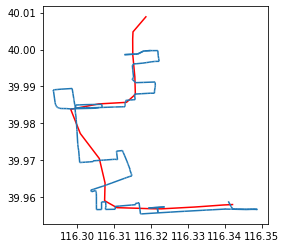

In [12]:
plt.figure(dpi=500)
# 创建一个包含两个子图的画布
fig, ax = plt.subplots()

# 在第一个子图上绘制trip折线
trip.plot(color='red', ax=ax)

# 在第二个子图上绘制res折线
res.plot(ax=ax)

# 显示图形
plt.show()